# 1. connect to kaggle and getting data

https://www.geeksforgeeks.org/python-os-path-join-method/

image dir is : ./image
image path is : ./image/how_to_download_data_from_kaggle.png
current path is : /Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Traditional_Model


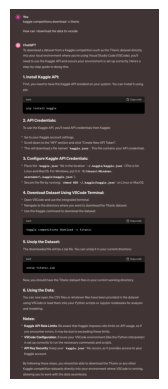

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'how_to_download_data_from_kaggle.png')

print("image dir is :", image_dir)
print("image path is :", image_path)        
print("current path is :", os.getcwd())                 # how to get current path 

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

1. First, you need to have the Kaggle API installed on your system. You can install it using pip:

In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


2. API Credentials: To use the Kaggle API, you'll need API credentials from Kaggle:

    2.1 Go to your Kaggle account settings.

    2.2 Scroll down to the "API" section and click "Create New API Token".
    
    2.3 This will download a file named kaggle.json. This file contains your API credentials.

3. Configure Kaggle API Credentials:
Place the kaggle.json file in the location ~/.kaggle/kaggle.json (This is for Linux and MacOS). (You had created this folder in the past)

image path is : ./image/kaggle_folder_path.png


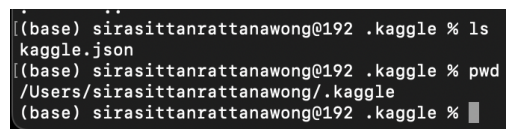

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'kaggle_folder_path.png')

print("image path is :", image_path)
# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

Secure the file by running: " chmod 600 ~/.kaggle/kaggle.json " on Linux or MacOS. (in terminal can be both local or vscode)

4. Download Dataset Using VSCode Terminal:

    4.1 Open VSCode and use the integrated terminal.

    4.2 Navigate to the directory where you want to download the Titanic dataset.
    
    4.3 Use the Kaggle command to download the dataset:

    " kaggle competitions download -c titanic "

5. Unzip the Dataset: The downloaded file will be a zip file. You can unzip it in your current directory: (vscode terminal)

    " unzip titanic.zip "

# 2. EDA and clean data 

## 2.1 visualize dataframe

In [4]:
import pandas as pd
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


count nan value : https://saturncloud.io/blog/how-to-count-nan-values-in-a-pandas-dataframe-column/

In [6]:
train_nan_count = df_train.isna().sum()

# This will print the count of NaN values in each column
print(train_nan_count)
print()
print(df_train.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
test_nan_count = df_test.isna().sum()

# This will print the count of NaN values in each column
print(test_nan_count)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 2.2 handle nan value

drop column cabin (too much nan value) : https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [8]:
df_train_drop_Cabin = df_train.drop('Cabin', axis=1)
df_test_drop_Cabin = df_test.drop('Cabin', axis=1)

counting occurence : https://saturncloud.io/blog/what-is-the-most-efficient-way-of-counting-occurrences-in-pandas/

In [9]:
df_train_drop_Cabin['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

drop nan value : https://saturncloud.io/blog/python-pandas-how-to-remove-nan-and-inf-values/

adding title   : https://www.geeksforgeeks.org/matplotlib-pyplot-title-in-python/

<class 'pandas.core.series.Series'>


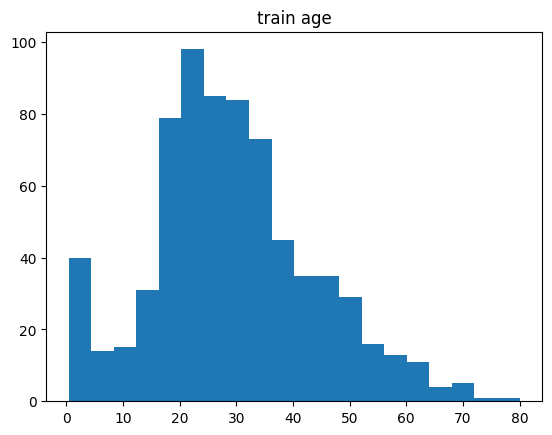

In [10]:
print(type(df_train_drop_Cabin['Age'].dropna()))
plt.hist(df_train_drop_Cabin['Age'].dropna(), bins=20)     #bins is optional 
plt.title('train age')
plt.show() 

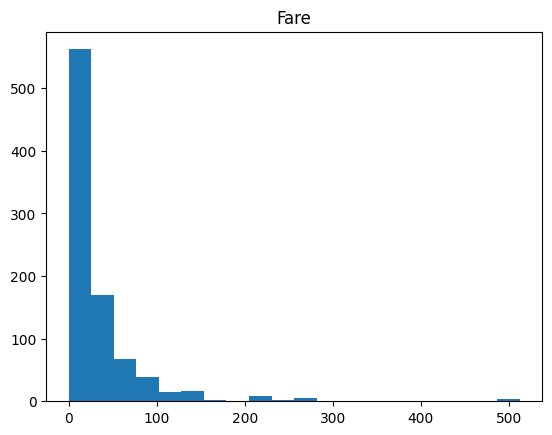

In [11]:
plt.hist(df_train_drop_Cabin['Fare'].dropna(), bins=20)
plt.title("Fare")
plt.show() 

multiple plots : https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/

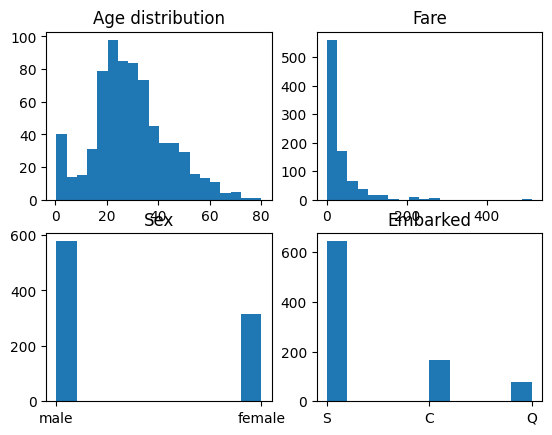

In [12]:
import math 
import numpy as np 

# Get the angles from 0 to 2 pie (360 degree) in narray object 
X = np.arange(0, math.pi*2, 0.05) 
  
# Using built-in trigonometric function we can directly plot 
# the given cosine wave for the given angles 
Y1 = np.sin(X) 
Y2 = np.cos(X) 
Y3 = np.tan(X) 
Y4 = np.tanh(X) 
  
# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 2) 
  
# For Sine Function 
axis[0, 0].hist(df_train_drop_Cabin['Age'].dropna(), bins=20)
axis[0, 0].set_title("Age distribution") 
  
# For Cosine Function 
axis[0, 1].hist(df_train_drop_Cabin['Fare'].dropna(), bins=20)
axis[0, 1].set_title("Fare") 
  
  
  
# For Tangent Function 
axis[1, 0].hist(df_train_drop_Cabin['Sex'].dropna())
axis[1, 0].set_title("Sex") 
  
# For Tanh Function 
axis[1, 1].hist(df_train_drop_Cabin['Embarked'].dropna()) 
axis[1, 1].set_title("Embarked") 
  
# Combine all the operations and display 
plt.show() 

fill nan value

In [13]:
# Count the occurrences of each value in the 'Embarked' column
embarked_counts_train = df_train_drop_Cabin['Embarked'].value_counts()
embarked_counts_test = df_test_drop_Cabin['Embarked'].value_counts()

# Print the counts
print(embarked_counts_train)
print()
print(embarked_counts_test)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


fill nan value : https://saturncloud.io/blog/how-to-replace-nan-values-with-the-average-of-columns-in-pandas-dataframe/

(fill with avg and mode has a little different syntax)

In [14]:
# 1. age
# Calculate the mean of the 'Age' column (excluding NaN values)
train_age_mean = df_train_drop_Cabin['Age'].mean()

# 2. embarked 
train_embarked_mode  = df_train_drop_Cabin['Embarked'].mode()[0]


# Create a new DataFrame by filling NaN values in the 'Age' column with the mean
df_train_drop_Cabin_fill_nan = df_train_drop_Cabin.copy()
df_train_drop_Cabin_fill_nan['Age'] = df_train_drop_Cabin['Age'].fillna(train_age_mean)
df_train_drop_Cabin_fill_nan['Embarked'] = df_train_drop_Cabin['Embarked'].fillna(train_embarked_mode)


In [15]:
# 1. age
# Calculate the mean of the 'Age' column (excluding NaN values)
test_age_mean = df_test_drop_Cabin['Age'].mean()

# Create a new DataFrame by filling NaN values in the 'Age' column with the mean
df_test_drop_Cabin_fill_nan = df_test_drop_Cabin.copy()
df_test_drop_Cabin_fill_nan['Age'] = df_test_drop_Cabin_fill_nan['Age'].fillna(test_age_mean)

# 2. fared
test_fared_mean = df_test_drop_Cabin_fill_nan['Fare'].mean()
df_test_drop_Cabin_fill_nan = df_test_drop_Cabin_fill_nan.copy()
df_test_drop_Cabin_fill_nan['Fare'] = df_test_drop_Cabin_fill_nan['Fare'].fillna(test_fared_mean)

df_test_drop_Cabin_fill_nan.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


plot value count : https://www.statology.org/pandas-plot-value-counts/

<Axes: xlabel='Embarked'>

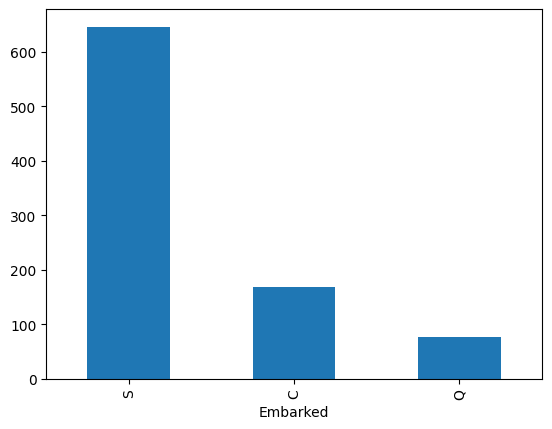

In [16]:
df_train_drop_Cabin_fill_nan.Embarked.value_counts().plot(kind='bar')

## 2.3 feature engineering

extract title from name

In [17]:
df_train_drop_Cabin_fill_nan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train_list = df_train_drop_Cabin_fill_nan['Name'].tolist()

In [19]:
train_list_of_title = []
for i in train_list :
    title_with_name = i.split(',')
    title = title_with_name[1].split('.')[0].strip()
    train_list_of_title.append(title)
print(train_list_of_title)

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr

replace a column name with a list : https://stackoverflow.com/questions/44608524/pandas-replace-column-values-with-a-list

In [20]:
df_train_feature_engineering = df_train_drop_Cabin_fill_nan.copy()
df_train_feature_engineering['Name'] = train_list_of_title
df_train_feature_engineering.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Name'>

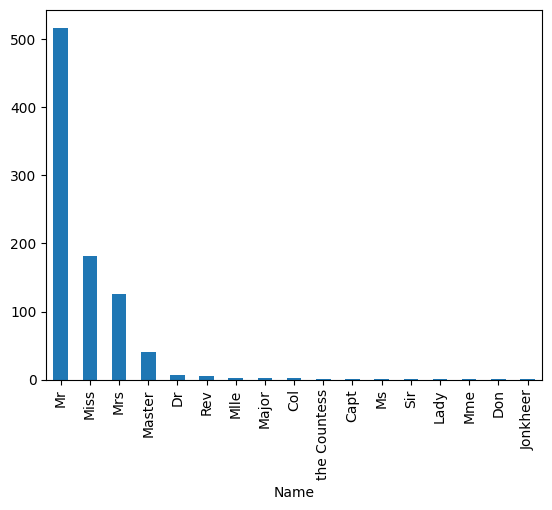

In [21]:
df_train_feature_engineering.Name.value_counts().plot(kind='bar')

In [22]:
list_of_train_feature_engineering = df_train_feature_engineering['Name'].tolist()
print(list_of_train_feature_engineering)
replace_list_of_train = []
for i in list_of_train_feature_engineering :
    if i in ['Mr', 'Mrs', 'Miss', 'Master'] :
        replace_list_of_train.append(i)
    else :
        replace_list_of_train.append('etc')
print(replace_list_of_train)

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr

In [23]:
df_train_feature_engineering['Name'] = replace_list_of_train
df_train_feature_engineering.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Name'>

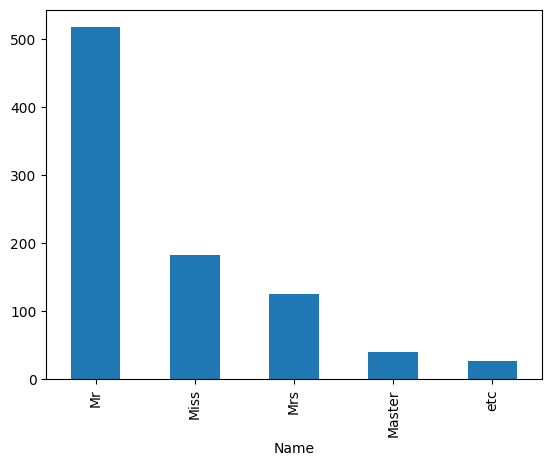

In [24]:
df_train_feature_engineering.Name.value_counts().plot(kind='bar')

In [25]:
test_list = df_test_drop_Cabin_fill_nan['Name'].tolist()

test_list_of_title = []
for i in test_list :
    title_with_name = i.split(',')
    title = title_with_name[1].split('.')[0].strip()
    test_list_of_title.append(title)
print(test_list_of_title)

['Mr', 'Mrs', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mr', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Master', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Ms', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Col', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Re

In [26]:
df_test_feature_engineering = df_test_drop_Cabin_fill_nan.copy()
df_test_feature_engineering['Name'] = test_list_of_title
df_test_feature_engineering.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,S


<Axes: xlabel='Name'>

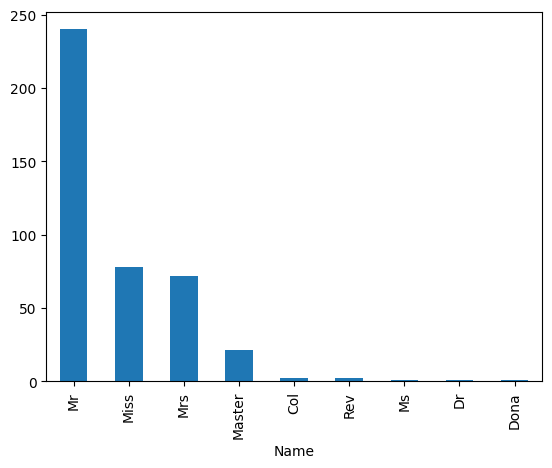

In [27]:
df_test_feature_engineering.Name.value_counts().plot(kind='bar')

In [28]:
list_of_test_feature_engineering = df_test_feature_engineering['Name'].tolist()
print(list_of_test_feature_engineering)
replace_list_of_test = []
for i in list_of_test_feature_engineering :
    if i in ['Mr', 'Mrs', 'Miss', 'Master'] :
        replace_list_of_test.append(i)
    else :
        replace_list_of_test.append('etc')
print(replace_list_of_test)

['Mr', 'Mrs', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mr', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Master', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Ms', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Col', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Re

In [29]:
df_test_feature_engineering['Name'] = replace_list_of_test
df_test_feature_engineering.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,S


<Axes: xlabel='Name'>

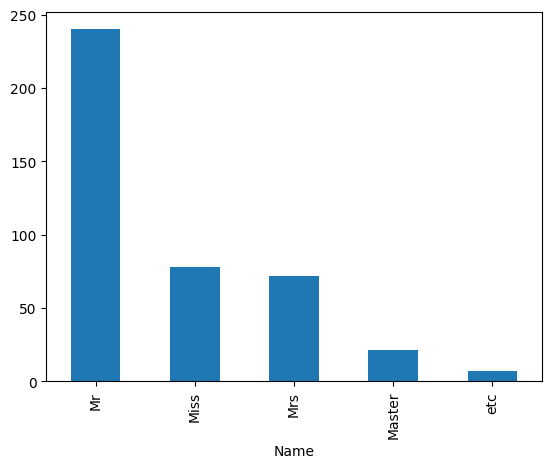

In [30]:
df_test_feature_engineering.Name.value_counts().plot(kind='bar')

## 2.4 drop column

In [31]:
drop_cols = ['PassengerId', 'Ticket']

df_train_drop_unrelated = df_train_feature_engineering.drop(drop_cols, axis=1)
df_test_drop_unrelated = df_test_feature_engineering.drop(drop_cols, axis=1)

In [32]:
df_train_drop_unrelated.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


## 2.5 encoding

https://towardsdatascience.com/how-to-encode-categorical-columns-using-python-9af10b36f049

ordinal data -> Ordinal data is a qualitative data type that classifies variables in a ranked order.

nominal data -> Nominal data is a qualitative type of data used to classify and label variables, and has no specific order or hierarchy. Variables like name, eye color and nationality are examples of nominal data.

In general, if we deal with nominal data, we prefer using one-hot encoding over label encoding

### 2.5.1 label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_list = ['Sex', 'Name']

In [34]:
for i in encoded_list :
    encoder.fit(df_train_drop_unrelated[i])
    train_values = encoder.transform(df_train_drop_unrelated[i])
    df_train_drop_unrelated[i] = train_values
    print(train_values[:10])

[1 0 0 0 1 1 1 1 0 0]
[2 3 1 3 2 2 2 0 3 3]


In [35]:
df_train_drop_unrelated.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,1,22.0,1,0,7.2500,S
1,1,1,3,0,38.0,1,0,71.2833,C
2,1,3,1,0,26.0,0,0,7.9250,S
3,1,1,3,0,35.0,1,0,53.1000,S
4,0,3,2,1,35.0,0,0,8.0500,S


In [36]:
for i in encoded_list :
    encoder.fit(df_test_drop_unrelated[i])
    test_values = encoder.transform(df_test_drop_unrelated[i])
    df_test_drop_unrelated[i] = test_values
    print(test_values[:10])

[1 0 1 1 0 1 0 1 0 1]
[2 3 2 2 3 2 1 2 3 2]


In [37]:
df_test_drop_unrelated.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,1,34.5,0,0,7.8292,Q
1,3,3,0,47.0,1,0,7.0000,S
2,2,2,1,62.0,0,0,9.6875,Q
3,3,2,1,27.0,0,0,8.6625,S
4,3,3,0,22.0,1,1,12.2875,S


### 2.5.2 one-hot encoding

In [38]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

gender_encoder = OneHotEncoder()
gender_reshaped = np.array(df_train_drop_unrelated['Embarked']).reshape(-1, 1)
gender_values = gender_encoder.fit_transform(gender_reshaped)
gender_values

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [39]:
# For 'gender' column
gender = pd.DataFrame(gender_values.toarray().astype(int), columns=['Embarked_Q', 'Embarked_S', 'Embarked_C'])             # https://www.statology.org/numpy-array-to-int/


drop_cols = ['Embarked']

# Combine all categorical columns as one dataframe
df_train_completed = pd.concat([gender, df_train_drop_unrelated.drop(drop_cols, axis=1)], axis=1)
df_train_completed


,Embarked_Q,Embarked_S,Embarked_C,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,0,1,0,3,2,1,22.000000,1,0,7.2500
1,1,0,0,1,1,3,0,38.000000,1,0,71.2833
2,0,0,1,1,3,1,0,26.000000,0,0,7.9250
3,0,0,1,1,1,3,0,35.000000,1,0,53.1000
4,0,0,1,0,3,2,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,2,4,1,27.000000,0,0,13.0000
887,0,0,1,1,1,1,0,19.000000,0,0,30.0000
888,0,0,1,0,3,1,0,29.699118,1,2,23.4500
889,1,0,0,1,1,2,1,26.000000,0,0,30.0000


In [40]:
gender_encoder = OneHotEncoder()
gender_reshaped = np.array(df_test_drop_unrelated['Embarked']).reshape(-1, 1)
gender_values = gender_encoder.fit_transform(gender_reshaped)
gender_values


# For 'gender' column
gender = pd.DataFrame(gender_values.toarray().astype(int), columns=['Embarked_Q', 'Embarked_S', 'Embarked_C'])              # https://www.statology.org/numpy-array-to-int/


drop_cols = ['Embarked']

# Combine all categorical columns as one dataframe
df_test_completed = pd.concat([gender, df_test_drop_unrelated.drop(drop_cols, axis=1)], axis=1)
df_test_completed

,Embarked_Q,Embarked_S,Embarked_C,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,2,1,34.50000,0,0,7.8292
1,0,0,1,3,3,0,47.00000,1,0,7.0000
2,0,1,0,2,2,1,62.00000,0,0,9.6875
3,0,0,1,3,2,1,27.00000,0,0,8.6625
4,0,0,1,3,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...,...,...,...
413,0,0,1,3,2,1,30.27259,0,0,8.0500
414,1,0,0,1,4,0,39.00000,0,0,108.9000
415,0,0,1,3,2,1,38.50000,0,0,7.2500
416,0,0,1,3,2,1,30.27259,0,0,8.0500


In [41]:
train_nan_count = df_train_completed.isna().sum()
test_nan_count = df_test_completed.isna().sum()
print(train_nan_count)
print()

print(test_nan_count)

Embarked_Q    0
Embarked_S    0
Embarked_C    0
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
dtype: int64

Embarked_Q    0
Embarked_S    0
Embarked_C    0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
dtype: int64


In [42]:
print(df_train_completed.dtypes)
print(df_test_completed.dtypes)

Embarked_Q      int64
Embarked_S      int64
Embarked_C      int64
Survived        int64
Pclass          int64
Name            int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
dtype: object
Embarked_Q      int64
Embarked_S      int64
Embarked_C      int64
Pclass          int64
Name            int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
dtype: object


## 2.6 correlation matrix

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

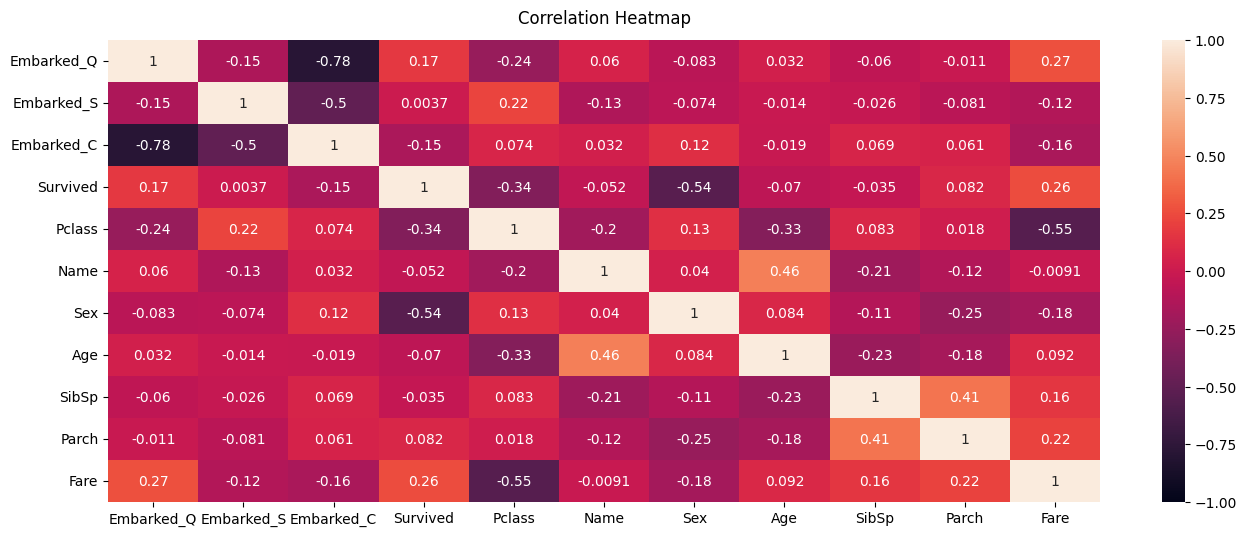

In [43]:
import seaborn as sns

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_train_completed.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## 2.7 split train eval test

select all column except one ->  https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-in-pandas ,     https://www.tutorialspoint.com/how-to-select-all-columns-except-one-in-a-pandas-dataframe

In [44]:
import pandas as pd
import torch

col = "Survived"
train_features_X = df_train_completed.loc[:, df_train_completed.columns != col]
train_features_X.head()


,Embarked_Q,Embarked_S,Embarked_C,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,0,1,3,2,1,22.0,1,0,7.2500
1,1,0,0,1,3,0,38.0,1,0,71.2833
2,0,0,1,3,1,0,26.0,0,0,7.9250
3,0,0,1,1,3,0,35.0,1,0,53.1000
4,0,0,1,3,2,1,35.0,0,0,8.0500


In [45]:
train_features_y = df_train_completed[col]
train_features_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and evaluation sets
X_train, X_val, y_train, y_val = train_test_split(train_features_X, train_features_y, test_size=0.15, random_state=42)
X_train.head()

,Embarked_Q,Embarked_S,Embarked_C,Pclass,Name,Sex,Age,SibSp,Parch,Fare
599,1,0,0,1,4,1,49.000000,1,0,56.9292
830,1,0,0,3,3,0,15.000000,1,0,14.4542
306,1,0,0,1,1,0,29.699118,0,0,110.8833
231,0,0,1,3,2,1,29.000000,0,0,7.7750
845,0,0,1,3,2,1,42.000000,0,0,7.5500


In [47]:
X_test = df_test_completed
X_test.head()

,Embarked_Q,Embarked_S,Embarked_C,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,2,1,34.5,0,0,7.8292
1,0,0,1,3,3,0,47.0,1,0,7.0000
2,0,1,0,2,2,1,62.0,0,0,9.6875
3,0,0,1,3,2,1,27.0,0,0,8.6625
4,0,0,1,3,3,0,22.0,1,1,12.2875


## 2.8 optional you can use StandardScaler to transform input (X features) it might provide better result (you need to check again if there are any mistakes by get the result tomorrow)
if you don't want to use this part, just comment everything in this section


In [48]:
#cols = list(X_train.columns)
#cols

In [49]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train_sc = sc.fit_transform(X_train)
#X_val_sc = sc.fit_transform(X_val)
#X_test_sc = sc.transform(X_test)

#X_train

array to pandas dataframe : https://datatofish.com/numpy-array-to-pandas-dataframe/

In [50]:
#X_train = pd.DataFrame(X_train_sc, columns=cols)
#X_val = pd.DataFrame(X_val_sc, columns=cols)
#X_test = pd.DataFrame(X_test_sc, columns=cols)
#X_train.head()

## 2.9 tensor data for neural network model

Pytorch’s neural network layers are not compatible with Numpy arrays.

we need to convert our data to be tensor format

pandas to tensor -> https://saturncloud.io/blog/how-do-i-convert-a-pandas-dataframe-to-a-pytorch-tensor/

In [51]:
tensor_train_X = torch.tensor(X_train.values)
tensor_train_y = torch.tensor(y_train.values)
tensor_eval_X = torch.tensor(X_val.values)
tensor_eval_y = torch.tensor(y_val.values)

tensor_test = torch.tensor(df_test_completed.values)

print(type(tensor_train_X))
print("train data shape is  :", tensor_train_X.shape)
print("train label shape is :", tensor_train_y.shape)
print("eval data shape is   :", tensor_eval_X.shape)
print("eval label shape is  :", tensor_eval_y.shape)
print("test data shape is   :", tensor_test.shape)

<class 'torch.Tensor'>
train data shape is  : torch.Size([757, 10])
train label shape is : torch.Size([757])
eval data shape is   : torch.Size([134, 10])
eval label shape is  : torch.Size([134])
test data shape is   : torch.Size([418, 10])


In [52]:
def print_tensor_details(tensor):
    print("Shape           :", tensor.shape)
    print("Data Type       :", tensor.dtype)
    print("Device          :", tensor.device)
    print("Requires Gradient :", tensor.requires_grad)
    print()


print_tensor_details(tensor_train_X)
print_tensor_details(tensor_train_y)
print_tensor_details(tensor_eval_X)
print_tensor_details(tensor_eval_y)
print_tensor_details(tensor_test)

Shape           : torch.Size([757, 10])
Data Type       : torch.float64
Device          : cpu
Requires Gradient : False

Shape           : torch.Size([757])
Data Type       : torch.int64
Device          : cpu
Requires Gradient : False

Shape           : torch.Size([134, 10])
Data Type       : torch.float64
Device          : cpu
Requires Gradient : False

Shape           : torch.Size([134])
Data Type       : torch.int64
Device          : cpu
Requires Gradient : False

Shape           : torch.Size([418, 10])
Data Type       : torch.float64
Device          : cpu
Requires Gradient : False



# 3. model simple neural network (from basic knowledge)

there are 2 methods 
1. 1 out_features then round
2. 2 out_features

In [53]:
input_shape = tensor_train_X.shape[1]
input_shape

10

## 3.1  one out feature -> same as 02 pytorch

### 3.1.1 setup device

In [127]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

### 3.1.2 initialize model and send it to device

https://discuss.pytorch.org/t/what-is-manual-seed/5939/4

In [146]:
from torch import nn

torch.manual_seed(42)           #set manual seed

model_0 = nn.Sequential(nn.Linear(in_features=input_shape, out_features=15),              
                        nn.ReLU(),
                        nn.Linear(in_features=15, out_features=15),
                        nn.ReLU(),
                        nn.Linear(in_features=15, out_features=15),
                        nn.ReLU(),
                        nn.Linear(in_features=15, out_features=1))

model_0.to(device)
model_0

Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=15, bias=True)
  (5): ReLU()
  (6): Linear(in_features=15, out_features=1, bias=True)
)

### 3.1.3 loss function and optimizer

loss function : https://stackoverflow.com/questions/66906884/how-is-pytorchs-class-bcewithlogitsloss-exactly-implemented

loss function : https://www.bualabs.com/archives/1945/what-is-cross-entropy-loss-logistic-regression-log-loss-loss-function-ep-3/

There are many types of optimizer ex. torch.optim.AdamW. You can change it to one of these : https://pytorch.org/docs/stable/optim.html

How to choose optimizer : https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

In [147]:
loss_fn = nn.BCEWithLogitsLoss() # BCELoss = no sigmoid built-in

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.001)

### 3.1.4 create accuracy function (optional)

In [148]:
def accuracy_fn(y_true, y_pred):
    y_true_squeezed = y_true.squeeze()  # Remove singleton dimensions, if any
    y_pred_squeezed = y_pred.squeeze()  # Remove singleton dimensions, if any

    if len(y_true_squeezed) != len(y_pred_squeezed):
        raise ValueError("Length of y_true and y_pred must be the same.")

    correct = torch.eq(y_true_squeezed, y_pred_squeezed).sum().item()
    #print("Number of correct predictions:", correct)
    
    acc = (correct / len(y_pred_squeezed)) * 100

    return acc

### 3.1.5 type cast from float64 to float32, send the data to device and check the input data detail

In [149]:

tensor_train_X = tensor_train_X.type(torch.float32).to(device) 
tensor_eval_X = tensor_eval_X.type(torch.float32).to(device)
tensor_train_y = tensor_train_y.type(torch.float32).to(device)
tensor_eval_y = tensor_eval_y.type(torch.float32).to(device)
tensor_test = tensor_test.type(torch.float32).to(device)


In [150]:
print_tensor_details(tensor_train_X)
print_tensor_details(tensor_train_y)
print_tensor_details(tensor_eval_X)
print_tensor_details(tensor_eval_y)
print_tensor_details(tensor_test)

Shape           : torch.Size([757, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([757])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([134, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([134])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([418, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False



#### try using the untrained model

In [151]:
y_logits = model_0(tensor_train_X)[:5]
# we need to type cast because of this error from below code. 
# Cannot convert a MPS Tensor to float64 dtype as the MPS framework doesn't support float64. Please use float32 instead.
y_logits

tensor([[-0.1735],
        [-0.2006],
        [-0.2803],
        [ 0.0276],
        [ 0.1456]], device='mps:0', grad_fn=<SliceBackward0>)

In [152]:
y_pred_probs = torch.sigmoid(y_logits)   # -> sigmoid activation function # 1 / ( 1 + e^(-x) )
y_pred_probs

tensor([[0.4567],
        [0.4500],
        [0.4304],
        [0.5069],
        [0.5363]], device='mps:0', grad_fn=<SigmoidBackward0>)

In [153]:
# Find the predicted labels (round the prediction probabilities)
y_pred = torch.round(y_pred_probs)
print(type(y_pred))
print(y_pred.shape)
y_pred

<class 'torch.Tensor'>
torch.Size([5, 1])


tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]], device='mps:0', grad_fn=<RoundBackward0>)

### 3.1.6 train the model 

In [154]:


#set the number of epochs
epochs = 1000

#build training and evaluating loop
for epoch in range(epochs) :
    
    ### training
    model_0.train()
    
    #1. forward pass
    y_logits = model_0(tensor_train_X).squeeze() #squeeze to remove extra 1 dim
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. calculate the loss
    train_loss = loss_fn(y_logits, tensor_train_y)
    train_acc = accuracy_fn(y_true = tensor_train_y, y_pred = y_pred)
    
    #3. optimizer
    optimizer.zero_grad()
    
    #4. loss backward
    train_loss.backward()
    
    #5. optimizer step
    optimizer.step()
    
    
    
    #evaluation
    model_0.eval()
    with torch.inference_mode() :
        #1. forward pass
        eval_logits = model_0(tensor_eval_X).squeeze()
        eval_pred = torch.round(torch.sigmoid(eval_logits))
        
        #2. calculate loss/accuracy
        eval_loss = loss_fn(eval_logits, tensor_eval_y)
        eval_acc = accuracy_fn(y_true = tensor_eval_y, y_pred = eval_pred)
    
    if(epoch == 0) :
        print("tensor_train_X shape is :", tensor_train_X.shape)
        print("tensor_train_y shape is :", tensor_train_y.shape)
        print("y_logits       shape is :", y_logits.shape)
        print("y_pred         shape is :", y_pred.shape)
        print("eval_logits   shape is :", eval_logits.shape)
        print("eval_pred      shape is :", eval_pred.shape)
        print("y_logits       dtype is :", y_logits.dtype)
        print("tensor_train_y dtype is :", tensor_train_y.dtype)
        print()
    if(epoch % 50 == 0) :
        print(f"Epoch: {epoch} | train Loss: {train_loss:.5f}, train Accuracy: {train_acc:.2f}% | eval loss: {eval_loss:.5f}, eval acc: {eval_acc:.5f}")

tensor_train_X shape is : torch.Size([757, 10])
tensor_train_y shape is : torch.Size([757])
y_logits       shape is : torch.Size([757])
y_pred         shape is : torch.Size([757])
eval_logits   shape is : torch.Size([134])
eval_pred      shape is : torch.Size([134])
y_logits       dtype is : torch.float32
tensor_train_y dtype is : torch.float32

Epoch: 0 | train Loss: 0.70886, train Accuracy: 43.73% | eval loss: 0.72289, eval acc: 36.56716
Epoch: 50 | train Loss: 0.69150, train Accuracy: 58.39% | eval loss: 0.70461, eval acc: 52.98507
Epoch: 100 | train Loss: 0.67808, train Accuracy: 62.22% | eval loss: 0.69014, eval acc: 55.22388
Epoch: 150 | train Loss: 0.66912, train Accuracy: 64.33% | eval loss: 0.67994, eval acc: 59.70149
Epoch: 200 | train Loss: 0.66488, train Accuracy: 65.39% | eval loss: 0.67480, eval acc: 61.94030
Epoch: 250 | train Loss: 0.66205, train Accuracy: 65.79% | eval loss: 0.67129, eval acc: 62.68657
Epoch: 300 | train Loss: 0.65969, train Accuracy: 66.05% | eval los

### 3.1.7 send the result

In [122]:
#detail in  #### try using the untrained model
y_pred_labels = torch.round(torch.sigmoid(model_0(tensor_test)))
y_pred_labels[:20] 

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]], device='mps:0', grad_fn=<SliceBackward0>)

In [123]:
# we need to use PassengerID
df_sent1 = df_test_drop_Cabin_fill_nan

In [124]:
df_sent1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [125]:
# Assuming y_pred_labels is a PyTorch tensor with the predicted labels
# and dfsent1 is the given DataFrame with the passenger information.

# First, we will convert the tensor of predictions to a list of integers
# The tensor is detached from the current graph, moved to CPU, converted to numpy, and then to a list
predicted_labels = y_pred_labels.detach().cpu().numpy().astype(int).flatten().tolist()

# Extract the PassengerId column from dfsent1
passenger_ids = df_sent1['PassengerId'].tolist()

# Create the final DataFrame using the lists above
df_final = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predicted_labels
})

df_final  # Display the first few rows of the final DataFrame

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [126]:
# Assuming df_final is your final DataFrame with 'PassengerId' and 'Survived' columns
df_final.to_csv('./submit_file/submission.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission.csv -m "02file model"

Score: 0.64354 -> without StandardScaler

Score: 0.66028 -> with StandardScaler

## 3.2 two out features -> same as 03 pytorch

### 3.2.1 setup the device

In [155]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

### 3.2.2 initialize the model and send to device

In [156]:
# we need not to flatten (our data are not image like 28*28)
class model_titanic(nn.Module) :
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) :
        
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
            
        )
        
    def forward(self, x) :
        return self.layer_stack(x)

In [157]:
torch.manual_seed(42)           #set manual seed

#setup model 
model_0 = model_titanic(
    input_shape=input_shape,   
    hidden_units=15,
    output_shape=2
)

model_0.to(device)
model_0

model_titanic(
  (layer_stack): Sequential(
    (0): Linear(in_features=10, out_features=15, bias=True)
    (1): Linear(in_features=15, out_features=2, bias=True)
  )
)

### 3.2.3 loss function and optimizer

loss function : https://stackoverflow.com/questions/66906884/how-is-pytorchs-class-bcewithlogitsloss-exactly-implemented

loss function : https://www.bualabs.com/archives/1945/what-is-cross-entropy-loss-logistic-regression-log-loss-loss-function-ep-3/

There are many types of optimizer ex. torch.optim.AdamW. You can change it to one of these : https://pytorch.org/docs/stable/optim.html

How to choose optimizer : https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

In [158]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

### 3.2.4 create accuracy function (optional)

In [159]:
def accuracy_fn(y_true, y_pred):
    y_true_squeezed = y_true.squeeze()  # Remove singleton dimensions, if any
    y_pred_squeezed = y_pred.squeeze()  # Remove singleton dimensions, if any

    if len(y_true_squeezed) != len(y_pred_squeezed):
        raise ValueError("Length of y_true and y_pred must be the same.")

    correct = torch.eq(y_true_squeezed, y_pred_squeezed).sum().item()
    #print("Number of correct predictions:", correct)
    
    acc = (correct / len(y_pred_squeezed)) * 100

    return acc

### 3.2.5 type cast from float64 to float32 and send the data to device and check the input data detail

In [160]:
tensor_train_X = tensor_train_X.type(torch.float32).to(device) 
tensor_eval_X = tensor_eval_X.type(torch.float32).to(device)
tensor_test = tensor_test.type(torch.float32).to(device)

tensor_train_y = tensor_train_y.type(torch.int64)               # when we use classification we need to convert from tensor back to int otherwise it will cause an error when calculate loss function.
tensor_eval_y = tensor_eval_y.type(torch.int64)

In [161]:
print_tensor_details(tensor_train_X)
print_tensor_details(tensor_train_y)
print_tensor_details(tensor_eval_X)
print_tensor_details(tensor_eval_y)
print_tensor_details(tensor_test)

Shape           : torch.Size([757, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([757])
Data Type       : torch.int64
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([134, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([134])
Data Type       : torch.int64
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([418, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False



### 3.2.6 train the model

In [162]:
# import tqdm
from tqdm.auto import tqdm
#set epochs
epochs = 100

#create training loop
for epoch in (range(epochs)) :

    model_0.train()
    
    #1. forward pass
    y_logits = model_0(tensor_train_X)  
    y_pred = y_logits.argmax(dim=1)
    
    #2. calculate loss
    train_loss = loss_fn(y_logits, tensor_train_y)
    train_acc = accuracy_fn(y_true = tensor_train_y, y_pred=y_pred)
    
    #3. optimizer zero grad
    optimizer.zero_grad()
        
    #4. loss backward
    train_loss.backward()
        
    #5. optimizer step
    optimizer.step()
    
    if(epoch == 0) :
        print("tensor_train_X shape is :", tensor_train_X.shape)
        print("tensor_train_y shape is :", tensor_train_y.shape)
        print("y_logits       shape is :", y_logits.shape)
        print("y_pred         shape is :", y_pred.shape)
        print("y_logits       dtype is :", y_logits.dtype)
        print("tensor_train_y dtype is :", tensor_train_y.dtype)
        print("train loss is           :", train_loss)
        print("train acc is            :", train_acc)
        print()
    
    ### evaluation
    model_0.eval()
    with torch.inference_mode() :
        
        #1. forward pass
        eval_logits = model_0(tensor_eval_X)
        eval_pred = eval_logits.argmax(dim=1)
            
        #2. calculate loss
        eval_loss = loss_fn(eval_logits, tensor_eval_y)
            
        #3. calculate accuracy
        eval_acc = accuracy_fn(y_true=tensor_eval_y, y_pred=eval_pred)               #from train part we got tensor after forward method we will use argmax position.
        
        if(epoch == 0) :
            print("tensor_eval_X shape is :", tensor_eval_X.shape)
            print("tensor_eval_y shape is :", tensor_eval_y.shape)
            print("eval_logits   shape is :", eval_logits.shape)
            print("eval_pred     shape is :", eval_pred.shape)
            print()
        
    
        
    if(epoch % 10 == 0) :
        ## Print out what's happening
        print(f"Epoch: {epoch}\n-------")
        print(f"\nTrain loss: {train_loss:.5f} | eval loss: {eval_loss:.5f}, eval acc: {eval_acc:.2f}%\n")

tensor_train_X shape is : torch.Size([757, 10])
tensor_train_y shape is : torch.Size([757])
y_logits       shape is : torch.Size([757, 2])
y_pred         shape is : torch.Size([757])
y_logits       dtype is : torch.float32
tensor_train_y dtype is : torch.int64
train loss is           : tensor(5.7470, device='mps:0', grad_fn=<NllLossBackward0>)
train acc is            : 31.175693527080583

tensor_eval_X shape is : torch.Size([134, 10])
tensor_eval_y shape is : torch.Size([134])
eval_logits   shape is : torch.Size([134, 2])
eval_pred     shape is : torch.Size([134])

Epoch: 0
-------

Train loss: 5.74697 | eval loss: 5.42619, eval acc: 28.36%

Epoch: 10
-------

Train loss: 4.42434 | eval loss: 4.16255, eval acc: 28.36%

Epoch: 20
-------

Train loss: 3.16733 | eval loss: 2.96391, eval acc: 29.10%

Epoch: 30
-------

Train loss: 2.02507 | eval loss: 1.88058, eval acc: 29.10%

Epoch: 40
-------

Train loss: 1.08379 | eval loss: 0.99486, eval acc: 31.34%

Epoch: 50
-------

Train loss: 0.6

### 3.2.7 send the result

In [77]:
y_logits = model_0(tensor_test)
y_logits[:5]

tensor([[-3.2260, -4.1108],
        [-4.7085, -6.0340],
        [-5.9876, -7.7739],
        [-2.6137, -3.3271],
        [-2.2034, -2.5078]], device='mps:0', grad_fn=<SliceBackward0>)

In [78]:
y_pred = y_logits.argmax(dim=1)
y_pred[:20]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       device='mps:0')

In [79]:
df_sent2 = df_test_drop_Cabin_fill_nan
df_sent2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [80]:
# Assuming y_pred_labels is a PyTorch tensor with the predicted labels
# and dfsent1 is the given DataFrame with the passenger information.

# First, we will convert the tensor of predictions to a list of integers
# The tensor is detached from the current graph, moved to CPU, converted to numpy, and then to a list
predicted_labels = y_pred.detach().cpu().numpy().astype(int).flatten().tolist()

# Extract the PassengerId column from dfsent1
passenger_ids = df_sent2['PassengerId'].tolist()

# Create the final DataFrame using the lists above
df_final2 = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predicted_labels
})

df_final2  # Display the first few rows of the final DataFrame

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
# Assuming df_final2 is your final DataFrame with 'PassengerId' and 'Survived' columns
df_final2.to_csv('./submit_file/submission2.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission2.csv -m "03file model"

Score: 0.66028 -> without StandardScaler

Score: 0.34210 -> with StandardScaler

# 4. basic ML algorithm

## 4.1 linear regression model (it is not used for classification)

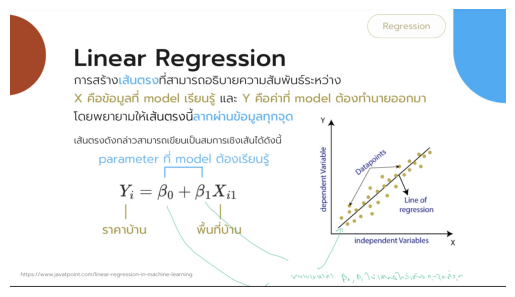

In [82]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'linear_regression.jpg')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

## 4.2 logistic regression model 

https://ai.plainenglish.io/logistic-regression-with-pytorch-8c3899712fa0

1. if type of inputs of loss function are different, it might cause error like "The Kernel crashed ..." it need not to be memory crash
2. check model and input if you suspect any input or model error

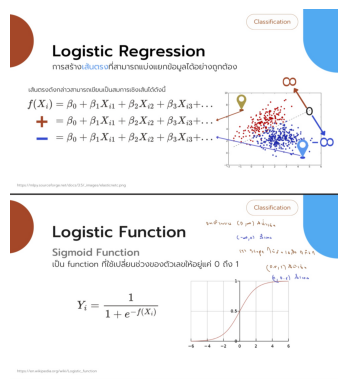

In [83]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'logistic_regression.jpg')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

### 4.2.1 set up the device

In [84]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

### 4.2.2 initialize the model and send it to device

In [85]:
# Codeblock 10
class Logistic_Regression(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.layer0 = nn.Linear(in_features=num_features, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer0(x)
        x = self.sigmoid(x)
        return x



torch.manual_seed(42)               #set the seed

# Codeblock 11
model = Logistic_Regression(num_features=input_shape).to(device)

### 4.2.3 loss function and optimizer

loss function : https://stackoverflow.com/questions/66906884/how-is-pytorchs-class-bcewithlogitsloss-exactly-implemented

loss function : https://www.bualabs.com/archives/1945/what-is-cross-entropy-loss-logistic-regression-log-loss-loss-function-ep-3/

There are many types of optimizer ex. torch.optim.AdamW. You can change it to one of these : https://pytorch.org/docs/stable/optim.html

How to choose optimizer : https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

In [86]:
# Codeblock 13
LEARNING_RATE = 0.001
EPOCHS = 4000

# Codeblock 14
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

### 4.2.4 create accuracy function (optional)

In [87]:
# Codeblock 15
def calculate_accuracy(preds, actuals):
    
    with torch.no_grad():
        rounded_preds = torch.round(preds)
        num_correct = torch.sum(rounded_preds == actuals)
        accuracy = num_correct/len(preds)
        
    return accuracy

### 4.2.5 typecast an send the data to device (check data dtype and data device)

we need to convert the datatype back to float32 in this case

In [88]:
tensor_train_y = tensor_train_y.type(torch.float32).to(device)
tensor_eval_y = tensor_eval_y.type(torch.float32).to(device)
print_tensor_details(tensor_train_X)
print_tensor_details(tensor_train_y)
print_tensor_details(tensor_eval_X)
print_tensor_details(tensor_eval_y)
print_tensor_details(tensor_test)

Shape           : torch.Size([757, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([757])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([134, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([134])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False

Shape           : torch.Size([418, 10])
Data Type       : torch.float32
Device          : mps:0
Requires Gradient : False



### 4.2.6 train the model

In [89]:
# Codeblock 16
train_losses = []
test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = model(tensor_train_X).squeeze()
    train_loss  = loss_function(train_preds, tensor_train_y)
    
    # Predicting test data #b
    with torch.no_grad():
        test_preds = model(tensor_eval_X).squeeze()
        test_loss  = loss_function(test_preds, tensor_eval_y)
        
    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, tensor_train_y)
    test_acc  = calculate_accuracy(test_preds, tensor_eval_y)
    
    # Backward propagation #d
    optimizer.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer.step()
    
    # Store training history #f
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())
    
    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
            f' Train loss: {np.round(train_loss.item(),3)} \t|' \
            f' Test loss: {np.round(test_loss.item(),3)} \t|' \
            f' Train acc: {np.round(train_acc.item(),2)} \t|' \
            f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 5.477 	| Test loss: 5.926 	| Train acc: 0.62 	| Test acc: 0.58
Epoch: 100 	| Train loss: 0.733 	| Test loss: 0.699 	| Train acc: 0.63 	| Test acc: 0.66
Epoch: 200 	| Train loss: 0.718 	| Test loss: 0.686 	| Train acc: 0.64 	| Test acc: 0.66
Epoch: 300 	| Train loss: 0.705 	| Test loss: 0.674 	| Train acc: 0.65 	| Test acc: 0.67
Epoch: 400 	| Train loss: 0.693 	| Test loss: 0.663 	| Train acc: 0.65 	| Test acc: 0.67
Epoch: 500 	| Train loss: 0.681 	| Test loss: 0.653 	| Train acc: 0.66 	| Test acc: 0.67
Epoch: 600 	| Train loss: 0.671 	| Test loss: 0.644 	| Train acc: 0.65 	| Test acc: 0.67
Epoch: 700 	| Train loss: 0.661 	| Test loss: 0.636 	| Train acc: 0.66 	| Test acc: 0.69
Epoch: 800 	| Train loss: 0.653 	| Test loss: 0.628 	| Train acc: 0.66 	| Test acc: 0.7
Epoch: 900 	| Train loss: 0.645 	| Test loss: 0.621 	| Train acc: 0.67 	| Test acc: 0.69
Epoch: 1000 	| Train loss: 0.638 	| Test loss: 0.615 	| Train acc: 0.67 	| Test acc: 0.69
Epoch: 1100 	| Train lo

### 4.2.7 send the model

In [90]:
y_test_pred_bf = model(tensor_test)
y_test_pred_bf = y_test_pred_bf .to("cpu")
y_test_pred_detached = y_test_pred_bf.detach()  # Detach the tensor from the computation graph
y_test_pred = y_test_pred_detached.round().int().squeeze().numpy()  # Now you can convert it to a NumPy array
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
# Assuming df_test_drop_Cabin_fill_nan contains the 'PassengerId' and has the same order as df_test_completed
df_sent4 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame using the PassengerId from df_sent5 and the predicted labels
df_final4 = pd.DataFrame({
    'PassengerId': df_sent4['PassengerId'],
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final4.head())

# Save the DataFrame to a CSV file
df_final4.to_csv('./submit_file/submission_logistic_regression.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_logistic_regression.csv -m "logistic_regression.csv model"

Score: 0.69138 -> without StandardScaler

Score: 0.66507 -> with StandardScaler

<span style="font-size:30px; color: orange;">**from 4.3 we use dataframe as an input not tensor anymore so we need not to check device of data input and model**</span>




## 4.3 SVM model (similar to logistic regression but can handle multi-class)

code of using the model : https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

detail of the model : https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/svm/_classes.py

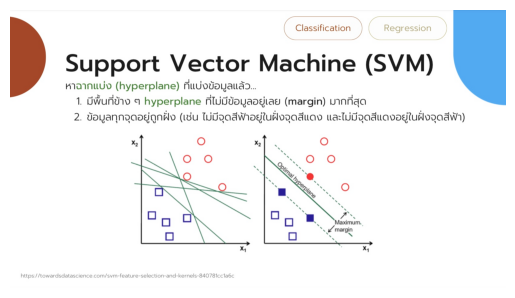

In [92]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'SVM.jpg')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

In [93]:
X_train.head()

,Embarked_Q,Embarked_S,Embarked_C,Pclass,Name,Sex,Age,SibSp,Parch,Fare
599,1,0,0,1,4,1,49.000000,1,0,56.9292
830,1,0,0,3,3,0,15.000000,1,0,14.4542
306,1,0,0,1,1,0,29.699118,0,0,110.8833
231,0,0,1,3,2,1,29.000000,0,0,7.7750
845,0,0,1,3,2,1,42.000000,0,0,7.5500


In [94]:
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
eval_predicted= support.predict(X_val)
score=accuracy_score(y_val, eval_predicted)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.6791044776119403


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [95]:
y_test_pred = support.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [96]:
# Assuming df_test_drop_Cabin_fill_nan contains the 'PassengerId' and has the same order as df_test_completed
df_sent5 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame using the PassengerId from df_sent5 and the predicted labels
df_final5 = pd.DataFrame({
    'PassengerId': df_sent5['PassengerId'],
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final5.head())

# Save the DataFrame to a CSV file
df_final5.to_csv('./submit_file/submission_svm.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_svm.csv -m "svm model"

Score: 0.65789 -> without StandardScaler

Score: 0.77272 -> with StandardScaler

### 4.3.2 grid search

## 4.4 decision tree

https://medium.com/equinox-blog/decision-tree-101-scikit-learn-afed3bf414a2 : *There are many types of Decision tree We use Classifier for this case

In [97]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None)                       

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
eval_predicted = clf.predict(X_val)


In [98]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_val,eval_predicted))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        78
           1       0.75      0.73      0.74        56

    accuracy                           0.78       134
   macro avg       0.78      0.78      0.78       134
weighted avg       0.78      0.78      0.78       134



In [99]:
y_test_pred = clf.predict(X_test)
print(y_test_pred)

[0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


In [100]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent6 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final6 = pd.DataFrame({
    'PassengerId': df_sent6['PassengerId'],  # PassengerId from df_sent6
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final6.head())

# Save the DataFrame to a CSV file
df_final6.to_csv('./submit_file/submission_decision_tree.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         1
4          896         1


send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_decision_tree.csv -m "decision tree model"

Score: 0.72009 -> without StandardScaler

Score: 0.69138 -> with StandardScaler

## 4.5 random forest

https://www.datacamp.com/tutorial/random-forests-classifier-python

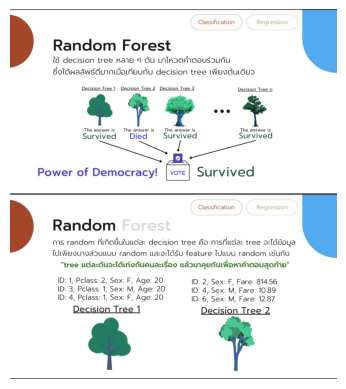

In [101]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'random_forest.jpg')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
eval_predicted = rf.predict(X_val)

accuracy = accuracy_score(y_val, eval_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.835820895522388


In [104]:
y_test_pred = rf.predict(X_test)
print(y_test_pred)

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [105]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent7 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final7 = pd.DataFrame({
    'PassengerId': df_sent6['PassengerId'],  # PassengerId from df_sent6
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final7.head())

# Save the DataFrame to a CSV file
df_final7.to_csv('./submit_file/random_forest.csv.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1


send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_random_forest.csv -m "random forest model"

Score: 0.74880 -> without StandardScaler

Score: 0.74880 -> with StandardScaler

## 4.6 KNN model (K-Nearest Neighbors) (deep learning) this also has an example of using sc = StandardScaler() (but I didn't use)

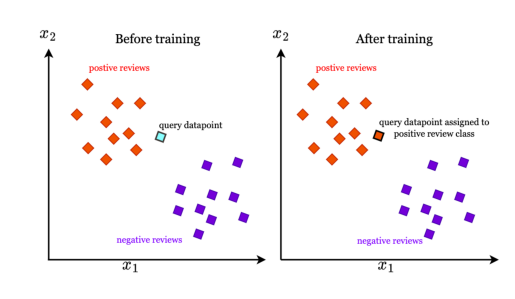

In [106]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'KNN_model.png')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [108]:
from sklearn.metrics import accuracy_score

eval_predicted = classifier.predict(X_val)
accuracy = accuracy_score(y_val, eval_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.753731343283582


In [109]:
y_test_pred = classifier.predict(X_test)
print(y_test_pred)

[0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [110]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent8 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final8 = pd.DataFrame({
    'PassengerId': df_sent8['PassengerId'],  # PassengerId from df_sent8
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final8.head())

# Save the DataFrame to a CSV file
df_final8.to_csv('./submit_file/submission_knn.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_knn.csv -m "KNN model"

Score: 0.66267 -> without StandardScaler

Score: 0.75358 -> with StandardScaler